# Kmean - Algorithm

<b> Step 1: </b> Random Centriods <br>
<b> Step 2: </b> Label data points <br>
<b> Step 3: </b> Recalculated the new Centroids

Repeat 2)-3) if the new centroid have changed postions <br>
Stop when centroids remain the same

# Preparation

import ‡πÑ‡∏•‡∏ö‡∏£‡∏≤‡∏£‡∏µ‡πà‡∏ó‡∏µ‡πà‡∏à‡∏≥‡πÄ‡∏õ‡πá‡∏ô

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Read datasets: created with 3 different Gaussian distributions (3 classes)

Preprocess: Clean data, calculate Log Returns
‡∏•‡πâ‡∏≤‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• (‡πÄ‡∏ä‡πà‡∏ô ‡∏•‡∏ö NaN, ‡∏ï‡∏£‡∏ß‡∏à‡∏ä‡∏ô‡∏¥‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•) ‡πÅ‡∏•‡∏∞‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡∏Ñ‡πà‡∏≤‡∏ú‡∏•‡∏ï‡∏≠‡∏ö‡πÅ‡∏ó‡∏ô‡πÅ‡∏ö‡∏ö‡∏•‡∏≠‡∏Å‡∏≤‡∏£‡∏¥‡∏ó‡∏∂‡∏° (Log Return) ‡∏ã‡∏∂‡πà‡∏á‡∏ä‡πà‡∏ß‡∏¢‡∏•‡∏î‡∏Ñ‡∏ß‡∏≤‡∏°‡πÅ‡∏õ‡∏£‡∏õ‡∏£‡∏ß‡∏ô‡πÅ‡∏•‡∏∞‡πÅ‡∏™‡∏î‡∏á‡∏Å‡∏≤‡∏£‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÅ‡∏õ‡∏•‡∏á‡∏Ç‡∏≠‡∏á‡∏£‡∏≤‡∏Ñ‡∏≤‡∏≠‡∏¢‡πà‡∏≤‡∏á‡πÅ‡∏°‡πà‡∏ô‡∏¢‡∏≥

In [ ]:
import pandas as pd
import numpy as np

# ‡πÇ‡∏´‡∏•‡∏î‡πÑ‡∏ü‡∏•‡πå Excel
xls = pd.ExcelFile("/content/Healthcare_stocks_cleaned.xlsx")

# ‡∏£‡∏≤‡∏¢‡∏ä‡∏∑‡πà‡∏≠‡∏´‡∏∏‡πâ‡∏ô (‡∏ä‡∏∑‡πà‡∏≠ sheet)
tickers = xls.sheet_names

# ‡∏î‡∏∂‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏Ç‡∏≠‡∏á‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏´‡∏∏‡πâ‡∏ô‡πÄ‡∏Å‡πá‡∏ö‡πÑ‡∏ß‡πâ
data_dict = {}

for ticker in tickers:
    df = xls.parse(ticker)

    # ‡πÅ‡∏õ‡∏•‡∏á Date ‡πÄ‡∏õ‡πá‡∏ô datetime ‡πÅ‡∏•‡∏∞‡∏ï‡∏±‡πâ‡∏á‡πÄ‡∏õ‡πá‡∏ô index
    df["Date"] = pd.to_datetime(df["Date"], errors='coerce')  # ‡∏õ‡πâ‡∏≠‡∏á‡∏Å‡∏±‡∏ô error
    df.dropna(subset=["Date"], inplace=True)
    df.set_index("Date", inplace=True)

    # ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏ä‡∏ô‡∏¥‡∏î‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• ‡πÅ‡∏•‡∏∞‡πÅ‡∏õ‡∏•‡∏á‡πÄ‡∏õ‡πá‡∏ô‡∏ï‡∏±‡∏ß‡πÄ‡∏•‡∏Ç‡∏ñ‡πâ‡∏≤‡∏à‡∏≥‡πÄ‡∏õ‡πá‡∏ô
    df["Close"] = pd.to_numeric(df["Close"], errors="coerce")

    # ‡∏•‡∏ö‡∏Ñ‡πà‡∏≤ missing
    df.dropna(subset=["Close"], inplace=True)



    # ‡πÄ‡∏Å‡πá‡∏ö‡πÑ‡∏ß‡πâ‡πÉ‡∏ô dict
    data_dict[ticker] = df

In [ ]:
print(xls.sheet_names)

['ABT', 'ABBV', 'A', 'ALGN', 'AMGN', 'BAX', 'BDX', 'TECH', 'BIIB', 'BSX', 'BMY', 'CAH', 'COR', 'CNC', 'CRL', 'CI', 'COO', 'CVS', 'DHR', 'DVA', 'DXCM', 'EW', 'ELV', 'GEHC', 'GILD', 'HCA', 'HSIC', 'HOLX', 'HUM', 'IDXX', 'INCY', 'PODD', 'ISRG', 'IQV', 'JNJ', 'LH', 'LLY', 'MCK', 'MDT', 'MRK', 'MTD', 'MRNA', 'MOH', 'PFE', 'DGX', 'REGN', 'RMD', 'RVTY', 'SOLV', 'STE', 'SYK', 'TMO', 'UNH', 'UHS', 'VRTX', 'VTRS', 'WAT', 'WST', 'ZBH', 'ZTS']


In [ ]:
df = pd.read_excel("/content/Healthcare_stocks_cleaned.xlsx", index_col = 0, parse_dates= True)
type(df)

pandas.core.frame.DataFrame

‡∏™‡∏≥‡πÄ‡∏ô‡∏≤‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• ‡∏à‡∏≤‡∏Å DataFrame df ‡∏°‡∏≤‡πÄ‡∏Å‡πá‡∏ö‡πÉ‡∏ô‡∏ï‡∏±‡∏ß‡πÅ‡∏õ‡∏£ stock (‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏õ‡πâ‡∏≠‡∏á‡∏Å‡∏±‡∏ô‡πÑ‡∏°‡πà‡πÉ‡∏´‡πâ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ï‡πâ‡∏ô‡∏â‡∏ö‡∏±‡∏ö‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÅ‡∏õ‡∏•‡∏á‡πÄ‡∏ß‡∏•‡∏≤‡πÅ‡∏Å‡πâ‡πÑ‡∏Ç‡∏´‡∏£‡∏∑‡∏≠‡∏ß‡∏¥‡πÄ‡∏Ñ‡∏£‡∏≤‡∏∞‡∏´‡πå‡∏ï‡πà‡∏≠)

‡πÅ‡∏™‡∏î‡∏á 5 ‡πÅ‡∏ñ‡∏ß‡πÅ‡∏£‡∏Å ‡∏Ç‡∏≠‡∏á DataFrame stock ‡πÇ‡∏î‡∏¢‡πÉ‡∏ä‡πâ .head() ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏î‡∏π‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÄ‡∏ö‡∏∑‡πâ‡∏≠‡∏á‡∏ï‡πâ‡∏ô

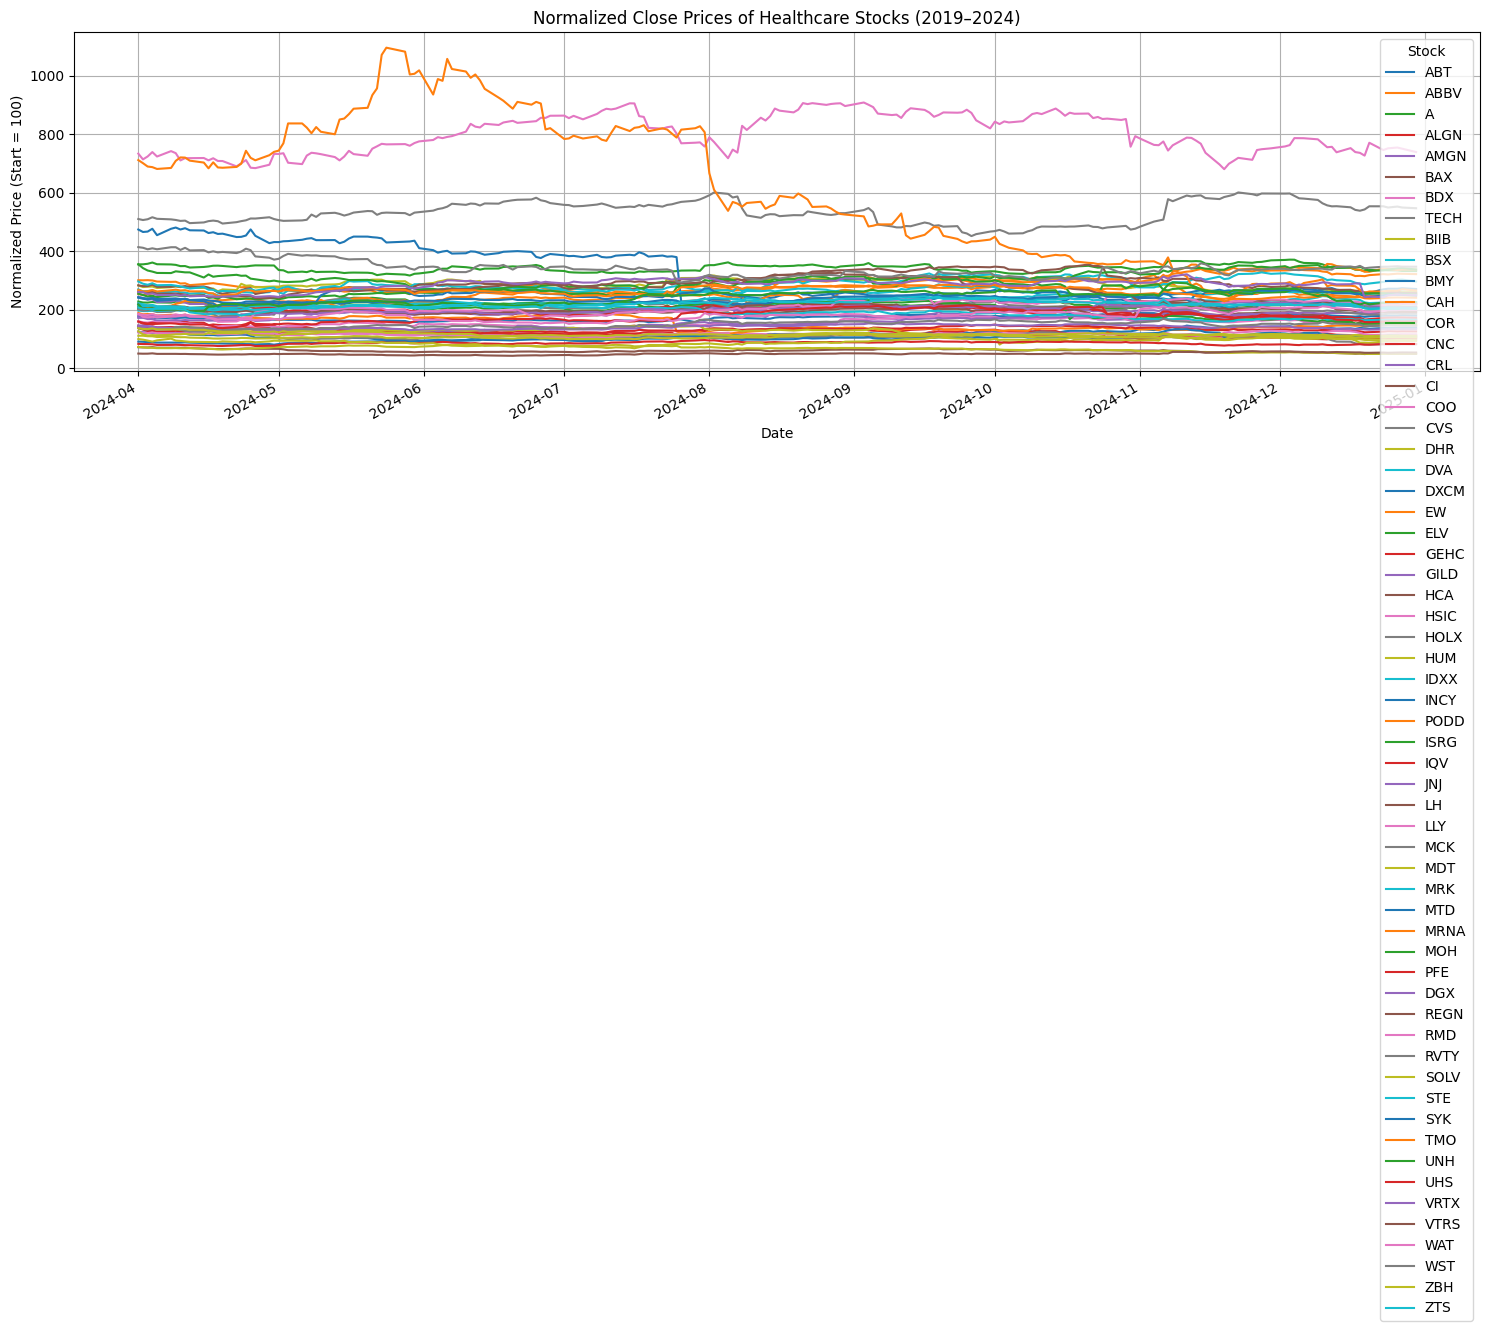

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ‡πÇ‡∏´‡∏•‡∏î‡πÑ‡∏ü‡∏•‡πå Excel
xls = pd.ExcelFile("/content/Healthcare_stocks_cleaned.xlsx")
tickers = xls.sheet_names

# ‡πÄ‡∏Å‡πá‡∏ö‡∏£‡∏≤‡∏Ñ‡∏≤‡∏ó‡∏µ‡πà normalize ‡πÅ‡∏•‡πâ‡∏ß
normalized_df = pd.DataFrame()

for ticker in tickers:
    df = xls.parse(ticker)

    # ‡πÅ‡∏õ‡∏•‡∏á‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå‡∏ß‡∏±‡∏ô‡∏ó‡∏µ‡πà
    df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
    df.dropna(subset=["Date"], inplace=True)
    df.set_index("Date", inplace=True)

    # ‡πÅ‡∏õ‡∏•‡∏á Close ‡πÄ‡∏õ‡πá‡∏ô‡∏ï‡∏±‡∏ß‡πÄ‡∏•‡∏Ç
    df["Close"] = pd.to_numeric(df["Close"], errors="coerce")
    df.dropna(subset=["Close"], inplace=True)

    # ‡∏Å‡∏£‡∏≠‡∏á‡πÄ‡∏â‡∏û‡∏≤‡∏∞‡∏ä‡πà‡∏ß‡∏á 2019‚Äì2024
    df = df[(df.index >= '2019-01-01') & (df.index <= '2024-12-31')]

    # ‡∏Ç‡πâ‡∏≤‡∏°‡∏ñ‡πâ‡∏≤‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÉ‡∏ô‡∏ä‡πà‡∏ß‡∏á‡∏ô‡∏µ‡πâ
    if df.empty:
        continue

    # Normalize ‡πÇ‡∏î‡∏¢‡πÉ‡∏´‡πâ‡∏£‡∏≤‡∏Ñ‡∏≤‡∏ß‡∏±‡∏ô‡πÅ‡∏£‡∏Å = 100
    normalized_price = df["Close"] / df["Close"].iloc[0] * 100

    # ‡∏£‡∏ß‡∏°‡πÄ‡∏Ç‡πâ‡∏≤ DataFrame ‡∏´‡∏•‡∏±‡∏Å
    normalized_df[ticker] = normalized_price

# ‡∏•‡∏ö NaN (‡∏´‡∏∏‡πâ‡∏ô‡∏ö‡∏≤‡∏á‡∏ï‡∏±‡∏ß‡∏≠‡∏≤‡∏à‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ß‡∏±‡∏ô‡πÄ‡∏î‡∏µ‡∏¢‡∏ß‡∏Å‡∏±‡∏ô)
normalized_df.dropna(inplace=True)

# ‡∏û‡∏•‡πá‡∏≠‡∏ï‡∏Å‡∏£‡∏≤‡∏ü
plt.figure(figsize=(15, 10))
normalized_df.plot(ax=plt.gca(), title='Normalized Close Prices of Healthcare Stocks (2019‚Äì2024)')
plt.xlabel("Date")
plt.ylabel("Normalized Price (Start = 100)")
plt.grid(True)
plt.legend(title="Stock")
plt.tight_layout()
plt.show()


In [ ]:
stock = df.copy()
stock.head()

Open       High        Low      Close    Volume
Date                                                            
2019-01-02  62.043289  63.346644  61.659424  62.837800   8737200
2019-01-03  59.115192  61.489795  58.472441  61.364816  10570700
2019-01-04  60.802406  61.221981  59.802570  59.918626   8299100
2019-01-07  61.712967  62.364647  60.864896  60.873825   9503000
2019-01-08  60.972034  62.168261  59.811510  62.087921   8905100

Calculate Features: Mean Log Return, Volatility
‡∏™‡∏£‡πâ‡∏≤‡∏á‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå‡∏™‡∏≥‡∏Ñ‡∏±‡∏ç 2 ‡∏ï‡∏±‡∏ß:

‡∏Ñ‡πà‡∏≤‡∏ú‡∏•‡∏ï‡∏≠‡∏ö‡πÅ‡∏ó‡∏ô‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢ (Mean Log Return)

‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ú‡∏±‡∏ô‡∏ú‡∏ß‡∏ô‡∏Ç‡∏≠‡∏á‡∏ú‡∏•‡∏ï‡∏≠‡∏ö‡πÅ‡∏ó‡∏ô (Volatility)



In [ ]:
data_dict

{'ABT':                   Open        High         Low       Close    Volume
 Date                                                                
 2019-01-02   62.043289   63.346644   61.659424   62.837800   8737200
 2019-01-03   59.115192   61.489795   58.472441   61.364816  10570700
 2019-01-04   60.802406   61.221981   59.802570   59.918626   8299100
 2019-01-07   61.712967   62.364647   60.864896   60.873825   9503000
 2019-01-08   60.972034   62.168261   59.811510   62.087921   8905100
 ...                ...         ...         ...         ...       ...
 2024-12-23  113.188957  113.387000  111.852198  112.882000   4028200
 2024-12-24  113.634544  113.703858  112.476013  113.020622   1480000
 2024-12-26  114.139534  114.674239  112.703757  113.080028   2960500
 2024-12-27  113.862289  114.812874  113.387001  113.882098   2829500
 2024-12-30  111.693764  113.515715  111.416503  113.010715   3475800
 
 [1509 rows x 5 columns],
 'ABBV':                   Open        High         Low

In [ ]:
import pandas as pd
import numpy as np
feature_rows = []


for ticker in xls.sheet_names:
    df = xls.parse(ticker)
    df["Date"] = pd.to_datetime(df["Date"])
    df.set_index("Date", inplace=True)

    df["LogReturn"] = np.log(df["Close"] / df["Close"].shift(1))
    df.dropna(subset=["LogReturn"], inplace=True)

    mean_log_ret = df["LogReturn"].mean()
    std_log_ret = df["LogReturn"].std()

    # ‡πÄ‡∏Å‡πá‡∏ö‡πÄ‡∏õ‡πá‡∏ô dictionary ‡πÅ‡∏•‡πâ‡∏ß‡πÉ‡∏™‡πà‡πÉ‡∏ô list
    feature_rows.append({
        "Ticker": ticker,
        "MeanLogReturn": mean_log_ret,
        "Volatility": std_log_ret
    })

# ‡πÅ‡∏õ‡∏•‡∏á list ‡πÄ‡∏õ‡πá‡∏ô DataFrame ‡∏ó‡∏µ‡πÄ‡∏î‡∏µ‡∏¢‡∏ß
features = pd.DataFrame(feature_rows)

# ‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏•
print(features.head())


  Ticker  MeanLogReturn  Volatility
0   AAPL       0.001000    0.020212
1    ACN       0.000468    0.018032
2   ADBE       0.000234    0.023659
3    ADI       0.000534    0.020467
4   ADSK       0.000369    0.024292


# **Standardize Features**
‡∏ó‡∏≥‡∏Å‡∏≤‡∏£‡∏™‡πÄ‡∏Å‡∏•‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÉ‡∏´‡πâ‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢ = 0 ‡πÅ‡∏•‡∏∞‡∏™‡πà‡∏ß‡∏ô‡πÄ‡∏ö‡∏µ‡πà‡∏¢‡∏á‡πÄ‡∏ö‡∏ô‡∏°‡∏≤‡∏ï‡∏£‡∏ê‡∏≤‡∏ô = 1 ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÉ‡∏´‡πâ‡πÇ‡∏°‡πÄ‡∏î‡∏•‡πÑ‡∏°‡πà Bias ‡∏à‡∏≤‡∏Å‡∏Ç‡∏ô‡∏≤‡∏î‡∏Ç‡∏≠‡∏á‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

feature_rows = []

for ticker in xls.sheet_names:
    df = xls.parse(ticker)
    df["Date"] = pd.to_datetime(df["Date"])
    df.set_index("Date", inplace=True)

    df["LogReturn"] = np.log(df["Close"] / df["Close"].shift(1))
    df.dropna(subset=["LogReturn"], inplace=True)

    mean_log_ret = df["LogReturn"].mean()
    std_log_ret = df["LogReturn"].std()

    feature_rows.append({
        "Ticker": ticker,
        "MeanLogReturn": mean_log_ret,
        "Volatility": std_log_ret
    })

features = pd.DataFrame(feature_rows)

# Standardize Features
scaler = StandardScaler()
features_scaled = features.copy()
features_scaled[['MeanLogReturn', 'Volatility']] = scaler.fit_transform(features[['MeanLogReturn', 'Volatility']])

print(features_scaled.head())


  Ticker  MeanLogReturn  Volatility
0   AAPL       0.593535   -0.685768
1    ACN      -0.408496   -1.002518
2   ADBE      -0.847917   -0.184902
3    ADI      -0.284921   -0.648668
4   ADSK      -0.593640   -0.093038


In [ ]:
print(features.isna().sum())


Ticker           0
MeanLogReturn    0
Volatility       0
dtype: int64


In [ ]:
features.describe()

MeanLogReturn  Volatility
count      69.000000   69.000000
mean        0.000685    0.024932
std         0.000535    0.006933
min        -0.000778    0.015716
25%         0.000368    0.019930
50%         0.000570    0.023925
75%         0.000969    0.027201
max         0.002485    0.048308

# ***‡∏ï‡∏µ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•***
‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå‡∏õ‡∏£‡∏∞‡∏Å‡∏≠‡∏ö‡∏î‡πâ‡∏ß‡∏¢ MeanLogReturn ‡πÅ‡∏•‡∏∞ Volatility ‡∏Ç‡∏≠‡∏á‡∏´‡∏∏‡πâ‡∏ô‡∏Å‡∏•‡∏∏‡πà‡∏°‡πÄ‡∏ó‡∏Ñ‡πÇ‡∏ô‡πÇ‡∏•‡∏¢‡∏µ‡∏à‡∏≥‡∏ô‡∏ß‡∏ô 69 ‡∏ï‡∏±‡∏ß

‡∏Ñ‡πà‡∏≤‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏Ç‡∏≠‡∏á MeanLogReturn ‡∏≠‡∏¢‡∏π‡πà‡∏ó‡∏µ‡πà‡∏õ‡∏£‡∏∞‡∏°‡∏≤‡∏ì 0.000685 ‡πÅ‡∏™‡∏î‡∏á‡∏ß‡πà‡∏≤‡∏´‡∏∏‡πâ‡∏ô‡πÇ‡∏î‡∏¢‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏°‡∏µ‡∏ú‡∏•‡∏ï‡∏≠‡∏ö‡πÅ‡∏ó‡∏ô‡∏£‡∏≤‡∏¢‡∏ß‡∏±‡∏ô‡πÄ‡∏•‡πá‡∏Å‡∏ô‡πâ‡∏≠‡∏¢‡πÉ‡∏ô‡πÄ‡∏ä‡∏¥‡∏á‡∏ö‡∏ß‡∏Å

Volatility ‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏õ‡∏£‡∏∞‡∏°‡∏≤‡∏ì 0.0249 ‡∏´‡∏°‡∏≤‡∏¢‡∏ñ‡∏∂‡∏á‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ú‡∏±‡∏ô‡∏ú‡∏ß‡∏ô‡∏Ç‡∏≠‡∏á‡∏ú‡∏•‡∏ï‡∏≠‡∏ö‡πÅ‡∏ó‡∏ô‡πÇ‡∏î‡∏¢‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏≠‡∏¢‡∏π‡πà‡πÉ‡∏ô‡∏£‡∏∞‡∏î‡∏±‡∏ö 2.5% ‡∏ï‡πà‡∏≠‡∏ß‡∏±‡∏ô

‡∏Ñ‡πà‡∏≤‡∏Ñ‡∏ß‡∏≤‡∏°‡πÅ‡∏õ‡∏£‡∏õ‡∏£‡∏ß‡∏ô (std) ‡∏Ç‡∏≠‡∏á‡∏ó‡∏±‡πâ‡∏á‡∏™‡∏≠‡∏á‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå‡∏ö‡∏≠‡∏Å‡∏ñ‡∏∂‡∏á‡∏Å‡∏≤‡∏£‡∏Å‡∏£‡∏∞‡∏à‡∏≤‡∏¢‡∏ï‡∏±‡∏ß‡∏Ç‡∏≠‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• ‡πÇ‡∏î‡∏¢ Volatility ‡∏°‡∏µ‡∏Ñ‡∏ß‡∏≤‡∏°‡πÅ‡∏õ‡∏£‡∏õ‡∏£‡∏ß‡∏ô‡∏™‡∏π‡∏á‡∏Å‡∏ß‡πà‡∏≤‡∏Ñ‡πà‡∏≤‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡∏°‡∏≤‡∏Å‡∏Å‡∏ß‡πà‡∏≤ MeanLogReturn

‡∏Ñ‡πà‡∏≤‡∏ï‡πà‡∏≥‡∏™‡∏∏‡∏î‡πÅ‡∏•‡∏∞‡∏Ñ‡πà‡∏≤‡∏™‡∏π‡∏á‡∏™‡∏∏‡∏î‡πÅ‡∏™‡∏î‡∏á‡∏ä‡πà‡∏ß‡∏á‡∏Å‡∏ß‡πâ‡∏≤‡∏á‡∏Ç‡∏≠‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• ‡πÄ‡∏ä‡πà‡∏ô MeanLogReturn ‡∏ï‡πà‡∏≥‡∏™‡∏∏‡∏î‡∏ï‡∏¥‡∏î‡∏•‡∏ö -0.000778 ‡πÅ‡∏•‡∏∞‡∏™‡∏π‡∏á‡∏™‡∏∏‡∏î 0.002485 ‡∏™‡πà‡∏ß‡∏ô Volatility ‡∏ï‡πà‡∏≥‡∏™‡∏∏‡∏î 0.0157 ‡∏™‡∏π‡∏á‡∏™‡∏∏‡∏î 0.0483

‡∏ó‡∏≥‡πÑ‡∏°‡∏ï‡πâ‡∏≠‡∏á Standardize Features
‡πÄ‡∏ô‡∏∑‡πà‡∏≠‡∏á‡∏à‡∏≤‡∏Å‡∏Ñ‡πà‡∏≤‡∏Ç‡∏≠‡∏á MeanLogReturn ‡πÅ‡∏•‡∏∞ Volatility ‡∏≠‡∏¢‡∏π‡πà‡πÉ‡∏ô‡∏™‡πÄ‡∏Å‡∏•‡∏ó‡∏µ‡πà‡πÅ‡∏ï‡∏Å‡∏ï‡πà‡∏≤‡∏á‡∏Å‡∏±‡∏ô‡∏°‡∏≤‡∏Å (‡πÄ‡∏ä‡πà‡∏ô 0.0006 ‡∏Å‡∏±‡∏ö 0.02) ‡∏´‡∏≤‡∏Å‡∏ô‡∏≥‡πÑ‡∏õ‡πÉ‡∏ä‡πâ‡∏Å‡∏±‡∏ö‡πÇ‡∏°‡πÄ‡∏î‡∏• K-Means ‡∏´‡∏£‡∏∑‡∏≠ Machine Learning ‡∏≠‡∏∑‡πà‡∏ô ‡πÜ ‡∏ó‡∏µ‡πà‡∏ß‡∏±‡∏î‡∏£‡∏∞‡∏¢‡∏∞‡∏´‡πà‡∏≤‡∏á‡πÇ‡∏î‡∏¢‡πÉ‡∏ä‡πâ‡∏°‡∏≤‡∏ï‡∏£‡∏ê‡∏≤‡∏ô Euclidean distance ‡∏à‡∏∞‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏Ç‡∏ô‡∏≤‡∏î‡πÉ‡∏´‡∏ç‡πà‡∏Å‡∏ß‡πà‡∏≤‡∏Ñ‡∏£‡∏≠‡∏ö‡∏á‡∏≥‡∏Å‡∏≤‡∏£‡∏ß‡∏±‡∏î‡∏£‡∏∞‡∏¢‡∏∞ ‡πÅ‡∏•‡∏∞‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡πÇ‡∏°‡πÄ‡∏î‡∏•‡πÄ‡∏Å‡∏¥‡∏î‡∏Ñ‡∏ß‡∏≤‡∏°‡∏•‡∏≥‡πÄ‡∏≠‡∏µ‡∏¢‡∏á (bias) ‡πÑ‡∏î‡πâ

‡∏î‡∏±‡∏á‡∏ô‡∏±‡πâ‡∏ô ‡πÄ‡∏£‡∏≤‡∏à‡∏∂‡∏á‡∏ó‡∏≥‡∏Å‡∏≤‡∏£ Standardize ‡∏Ñ‡∏∑‡∏≠

‡∏õ‡∏£‡∏±‡∏ö‡πÉ‡∏´‡πâ‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢ (mean) ‡πÄ‡∏õ‡πá‡∏ô 0

‡πÅ‡∏•‡∏∞‡∏™‡πà‡∏ß‡∏ô‡πÄ‡∏ö‡∏µ‡πà‡∏¢‡∏á‡πÄ‡∏ö‡∏ô‡∏°‡∏≤‡∏ï‡∏£‡∏ê‡∏≤‡∏ô (standard deviation) ‡πÄ‡∏õ‡πá‡∏ô 1

‡∏ß‡∏¥‡∏ò‡∏µ‡∏ô‡∏µ‡πâ‡∏ä‡πà‡∏ß‡∏¢‡πÉ‡∏´‡πâ‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå‡∏ó‡∏±‡πâ‡∏á‡∏´‡∏°‡∏î‡∏°‡∏µ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏≥‡∏Ñ‡∏±‡∏ç‡πÄ‡∏ó‡πà‡∏≤‡πÄ‡∏ó‡∏µ‡∏¢‡∏°‡∏Å‡∏±‡∏ô‡πÄ‡∏°‡∏∑‡πà‡∏≠‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡∏£‡∏∞‡∏¢‡∏∞‡∏´‡πà‡∏≤‡∏á ‡πÅ‡∏•‡∏∞‡∏ä‡πà‡∏ß‡∏¢‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏õ‡∏£‡∏∞‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏†‡∏≤‡∏û‡πÅ‡∏•‡∏∞‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ñ‡∏π‡∏Å‡∏ï‡πâ‡∏≠‡∏á‡∏Ç‡∏≠‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏•

Standardize Features
‡∏ó‡∏≥‡∏Å‡∏≤‡∏£‡∏™‡πÄ‡∏Å‡∏•‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÉ‡∏´‡πâ‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢ = 0 ‡πÅ‡∏•‡∏∞‡∏™‡πà‡∏ß‡∏ô‡πÄ‡∏ö‡∏µ‡πà‡∏¢‡∏á‡πÄ‡∏ö‡∏ô‡∏°‡∏≤‡∏ï‡∏£‡∏ê‡∏≤‡∏ô = 1 ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡πÉ‡∏´‡πâ‡πÇ‡∏°‡πÄ‡∏î‡∏•‡πÑ‡∏°‡πà‡∏•‡∏≥‡πÄ‡∏≠‡∏µ‡∏¢‡∏á‡∏à‡∏≤‡∏Å‡∏Ç‡∏ô‡∏≤‡∏î‡∏Ç‡∏≠‡∏á‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå

Apply K-Means Clustering
‡πÉ‡∏ä‡πâ‡∏≠‡∏±‡∏•‡∏Å‡∏≠‡∏£‡∏¥‡∏ó‡∏∂‡∏° K-Means ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏à‡∏±‡∏î‡∏Å‡∏•‡∏∏‡πà‡∏°‡∏´‡∏∏‡πâ‡∏ô‡∏ï‡∏≤‡∏°‡∏û‡∏§‡∏ï‡∏¥‡∏Å‡∏£‡∏£‡∏°‡∏ú‡∏•‡∏ï‡∏≠‡∏ö‡πÅ‡∏ó‡∏ô‡πÅ‡∏•‡∏∞‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ú‡∏±‡∏ô‡∏ú‡∏ß‡∏ô‡∏ó‡∏µ‡πà‡∏Ñ‡∏•‡πâ‡∏≤‡∏¢‡∏Å‡∏±‡∏ô



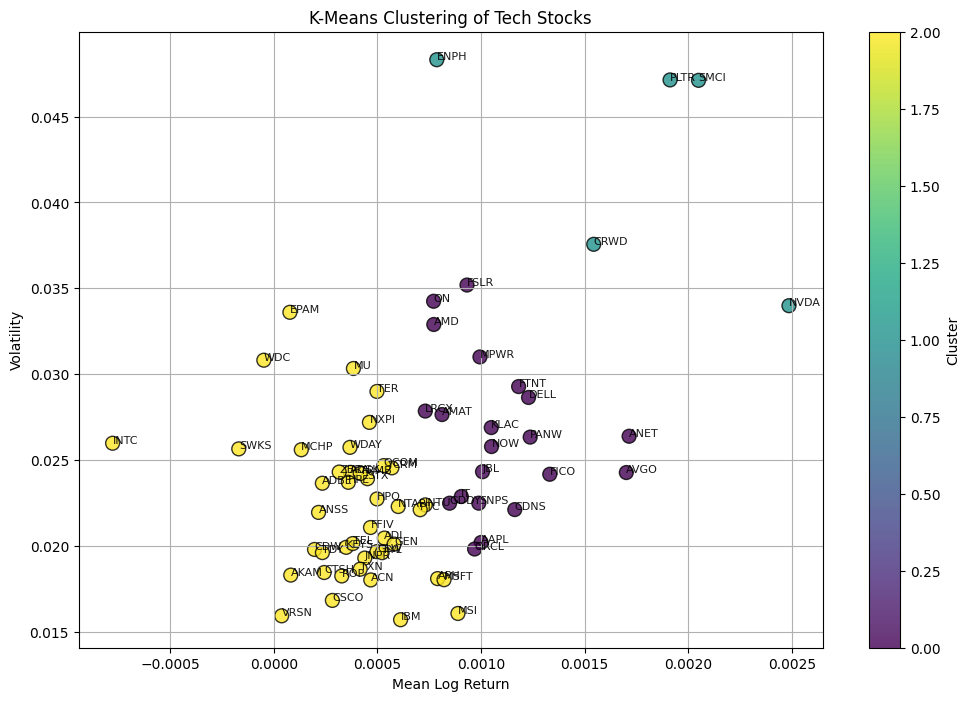

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# ‡πÄ‡∏ï‡∏£‡∏µ‡∏¢‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• X ‡∏à‡∏≤‡∏Å features
X1 = features['MeanLogReturn'].values
X2 = features['Volatility'].values
X = np.array(list(zip(X1, X2)))

# ‡∏™‡πÄ‡∏Å‡∏•‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏Å‡πà‡∏≠‡∏ô‡∏ó‡∏≥ K-Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ‡∏ó‡∏≥ K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
features['Cluster'] = clusters

# ‡∏û‡∏•‡πá‡∏≠‡∏ï‡∏Å‡∏£‡∏≤‡∏ü‡∏û‡∏£‡πâ‡∏≠‡∏°‡∏™‡∏µ‡∏ï‡∏≤‡∏° Cluster
plt.figure(figsize=(12,8))
scatter = plt.scatter(features['MeanLogReturn'], features['Volatility'],
                      c=features['Cluster'], cmap='viridis', s=100, edgecolors='k', alpha=0.8)

# ‡πÅ‡∏™‡∏î‡∏á‡∏ä‡∏∑‡πà‡∏≠‡∏´‡∏∏‡πâ‡∏ô (annotation)
for i, row in features.iterrows():
    plt.text(row['MeanLogReturn'], row['Volatility'], row['Ticker'], fontsize=8, alpha=0.9)

plt.xlabel('Mean Log Return')
plt.ylabel('Volatility')
plt.title('K-Means Clustering of Tech Stocks')
plt.grid(True)
plt.colorbar(scatter, label='Cluster')
plt.show()


In [ ]:
print(features)

   Ticker  MeanLogReturn  Volatility  Cluster
0    AAPL       0.001000    0.020212        0
1     ACN       0.000468    0.018032        2
2    ADBE       0.000234    0.023659        2
3     ADI       0.000534    0.020467        2
4    ADSK       0.000369    0.024292        2
..    ...            ...         ...      ...
64    TYL       0.000523    0.019618        2
65   VRSN       0.000038    0.015944        2
66   WDAY       0.000368    0.025748        2
67    WDC      -0.000048    0.030820        2
68   ZBRA       0.000316    0.024312        2

[69 rows x 4 columns]


In [ ]:
# ‡∏™‡πà‡∏á‡∏≠‡∏≠‡∏Å‡πÑ‡∏ü‡∏•‡πå Excel ‡∏û‡∏£‡πâ‡∏≠‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• Cluster
features.to_excel("clustered_tech_stocks.xlsx", index=False)

print("‡∏™‡πà‡∏á‡∏≠‡∏≠‡∏Å‡πÑ‡∏ü‡∏•‡πå clustered_tech_stocks.xlsx ‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢‡πÅ‡∏•‡πâ‡∏ß")


‡∏™‡πà‡∏á‡∏≠‡∏≠‡∏Å‡πÑ‡∏ü‡∏•‡πå clustered_tech_stocks.xlsx ‡πÄ‡∏£‡∏µ‡∏¢‡∏ö‡∏£‡πâ‡∏≠‡∏¢‡πÅ‡∏•‡πâ‡∏ß


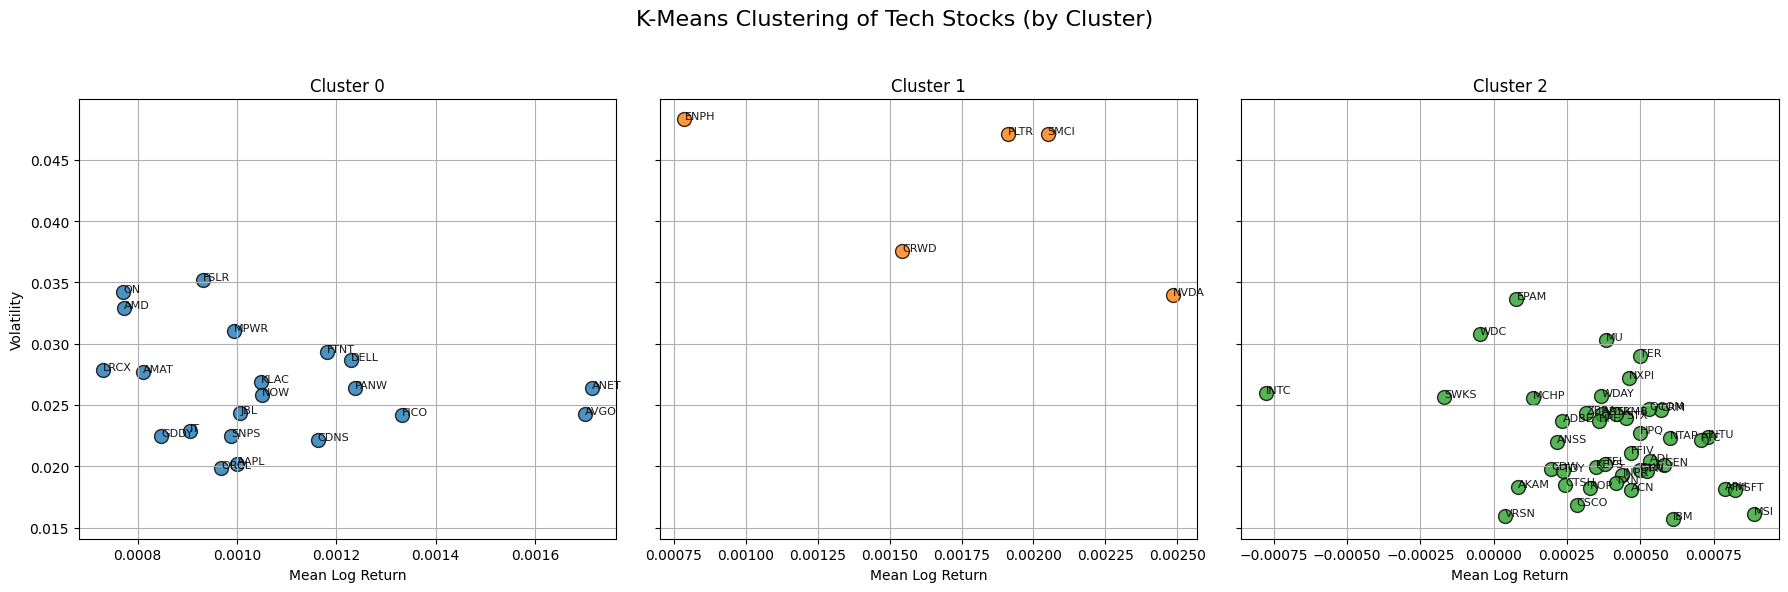

In [ ]:
import matplotlib.pyplot as plt

# ‡∏Å‡∏≥‡∏´‡∏ô‡∏î‡∏™‡∏µ‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏Ñ‡∏•‡∏±‡∏™‡πÄ‡∏ï‡∏≠‡∏£‡πå (‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏õ‡∏£‡∏±‡∏ö‡πÑ‡∏î‡πâ)
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
cluster_labels = sorted(features['Cluster'].unique())
num_clusters = len(cluster_labels)

# ‡∏™‡∏£‡πâ‡∏≤‡∏á subplot
fig, axes = plt.subplots(1, num_clusters, figsize=(6 * num_clusters, 6), sharey=True)

if num_clusters == 1:
    axes = [axes]  # ‡∏ñ‡πâ‡∏≤‡∏°‡∏µ‡∏Ñ‡∏•‡∏±‡∏™‡πÄ‡∏ï‡∏≠‡∏£‡πå‡πÄ‡∏î‡∏µ‡∏¢‡∏ß

for i, cluster in enumerate(cluster_labels):
    ax = axes[i]
    cluster_data = features[features['Cluster'] == cluster]

    ax.scatter(cluster_data['MeanLogReturn'], cluster_data['Volatility'],
               color=colors[i % len(colors)], s=100, edgecolors='k', alpha=0.8)

    for _, row in cluster_data.iterrows():
        ax.text(row['MeanLogReturn'], row['Volatility'], row['Ticker'], fontsize=8, alpha=0.9)

    ax.set_title(f"Cluster {cluster}")
    ax.set_xlabel("Mean Log Return")
    if i == 0:
        ax.set_ylabel("Volatility")
    ax.grid(True)

plt.suptitle("K-Means Clustering of Tech Stocks (by Cluster)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



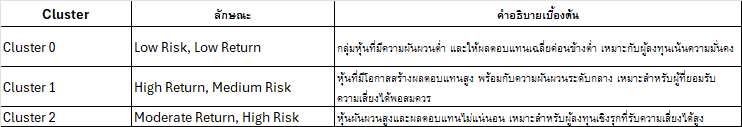

# ***  ‡∏ß‡∏¥‡∏ò‡∏µ‡πÄ‡∏•‡∏∑‡∏≠‡∏Å ‚Äú‡∏´‡∏∏‡πâ‡∏ô‡∏ï‡∏±‡∏ß‡πÅ‡∏ó‡∏ô‚Äù ‡∏à‡∏≤‡∏Å‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏Ñ‡∏•‡∏±‡∏™‡πÄ‡∏ï‡∏≠‡∏£‡πå  ‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡∏´‡∏∏‡πâ‡∏ô‡∏ó‡∏µ‡πà ‚Äú‡πÉ‡∏Å‡∏•‡πâ‡∏à‡∏∏‡∏î‡∏®‡∏π‡∏ô‡∏¢‡πå‡∏Å‡∏•‡∏≤‡∏á‡∏Ñ‡∏•‡∏±‡∏™‡πÄ‡∏ï‡∏≠‡∏£‡πå‡∏°‡∏≤‡∏Å‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î  ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡∏£‡∏∞‡∏¢‡∏∞‡∏´‡πà‡∏≤‡∏á‡∏à‡∏≤‡∏Å‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏à‡∏∏‡∏î (‡∏´‡∏∏‡πâ‡∏ô) ‡πÑ‡∏õ‡∏¢‡∏±‡∏á centroid ‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏•‡∏±‡∏™‡πÄ‡∏ï‡∏≠‡∏£‡πå‡∏ô‡∏±‡πâ‡∏ô ‡πÜ***

In [ ]:
from sklearn.metrics import pairwise_distances_argmin_min

# ‡∏´‡∏≤ centroid ‡∏Ç‡∏≠‡∏á‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏Ñ‡∏•‡∏±‡∏™‡πÄ‡∏ï‡∏≠‡∏£‡πå
centroids = kmeans.cluster_centers_

# ‡∏´‡∏≤ index ‡∏Ç‡∏≠‡∏á‡∏´‡∏∏‡πâ‡∏ô‡∏ó‡∏µ‡πà‡πÉ‡∏Å‡∏•‡πâ centroid ‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î‡πÉ‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏Ñ‡∏•‡∏±‡∏™‡πÄ‡∏ï‡∏≠‡∏£‡πå
closest, _ = pairwise_distances_argmin_min(centroids, X_scaled)

# ‡πÅ‡∏™‡∏î‡∏á‡∏´‡∏∏‡πâ‡∏ô‡∏ï‡∏±‡∏ß‡πÅ‡∏ó‡∏ô
representatives = features.iloc[closest]
print(representatives[['Ticker', 'Cluster']])


   Ticker  Cluster
37   KLAC        0
51   PLTR        1
21   FFIV        2


 ‡∏ß‡∏¥‡∏ò‡∏µ‡∏ó‡∏µ‡πà 2: ‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡∏´‡∏∏‡πâ‡∏ô‡∏ó‡∏µ‡πà‡∏°‡∏µ ‚Äú‡∏Ç‡∏ô‡∏≤‡∏î‡∏Å‡∏•‡∏≤‡∏á‚Äù (‡∏Ñ‡πà‡∏≤‡∏Å‡∏•‡∏≤‡∏á)
‡πÉ‡∏ä‡πâ median ‡∏´‡∏£‡∏∑‡∏≠ average ‡∏Ç‡∏≠‡∏á MeanLogReturn ‡πÅ‡∏•‡∏∞ Volatility ‡∏†‡∏≤‡∏¢‡πÉ‡∏ô‡∏Å‡∏•‡∏∏‡πà‡∏°

‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡∏´‡∏∏‡πâ‡∏ô‡∏ó‡∏µ‡πà‡∏Ñ‡πà‡∏≤‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå‡πÉ‡∏Å‡∏•‡πâ‡∏Ñ‡πà‡∏≤ median ‡∏°‡∏≤‡∏Å‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î

# ‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô: ‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡∏´‡∏∏‡πâ‡∏ô‡∏ó‡∏µ‡πà‡πÉ‡∏Å‡∏•‡πâ‡∏Ñ‡πà‡∏≤‡∏Å‡∏•‡∏≤‡∏á‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏•‡∏±‡∏™‡πÄ‡∏ï‡∏≠‡∏£‡πå (Median-Based Representative) ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì median ‡∏Ç‡∏≠‡∏á MeanLogReturn ‡πÅ‡∏•‡∏∞ median ‡∏Ç‡∏≠‡∏á Volatility


# ***‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì ‡∏£‡∏∞‡∏¢‡∏∞‡∏´‡πà‡∏≤‡∏á (Euclidean distance) ***

In [ ]:
import numpy as np

representatives = []

# ‡∏ß‡∏ô‡∏•‡∏π‡∏õ‡πÉ‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏Ñ‡∏•‡∏±‡∏™‡πÄ‡∏ï‡∏≠‡∏£‡πå
for cluster in sorted(features['Cluster'].unique()):
    cluster_data = features[features['Cluster'] == cluster]

    # ‡∏Ñ‡πà‡∏≤‡∏Å‡∏•‡∏≤‡∏á‡∏Ç‡∏≠‡∏á‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå‡πÉ‡∏ô‡∏Ñ‡∏•‡∏±‡∏™‡πÄ‡∏ï‡∏≠‡∏£‡πå
    median_log_ret = cluster_data['MeanLogReturn'].median()
    median_vol = cluster_data['Volatility'].median()

    # ‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì‡∏£‡∏∞‡∏¢‡∏∞‡∏´‡πà‡∏≤‡∏á‡∏à‡∏≤‡∏Å‡∏Ñ‡πà‡∏≤‡∏Å‡∏•‡∏≤‡∏á
    distances = np.sqrt(
        (cluster_data['MeanLogReturn'] - median_log_ret)**2 +
        (cluster_data['Volatility'] - median_vol)**2
    )

    # ‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡∏´‡∏∏‡πâ‡∏ô‡∏ó‡∏µ‡πà‡πÉ‡∏Å‡∏•‡πâ‡∏Ñ‡πà‡∏≤‡∏Å‡∏•‡∏≤‡∏á‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î
    representative_idx = distances.idxmin()
    representatives.append(features.loc[representative_idx])

# ‡πÅ‡∏™‡∏î‡∏á‡∏´‡∏∏‡πâ‡∏ô‡∏ï‡∏±‡∏ß‡πÅ‡∏ó‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏Å‡∏•‡∏∏‡πà‡∏°
representative_df = pd.DataFrame(representatives)
print(representative_df[['Ticker', 'Cluster', 'MeanLogReturn', 'Volatility']])


   Ticker  Cluster  MeanLogReturn  Volatility
50   PANW        0       0.001237    0.026344
51   PLTR        1       0.001912    0.047132
9    ANSS        2       0.000216    0.021962


# ***üìå ‡∏ß‡∏¥‡∏ò‡∏µ‡πÄ‡∏•‡∏∑‡∏≠‡∏Å ‚Äú‡∏´‡∏∏‡πâ‡∏ô‡∏ï‡∏±‡∏ß‡πÅ‡∏ó‡∏ô‚Äù ‡∏à‡∏≤‡∏Å‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏Ñ‡∏•‡∏±‡∏™‡πÄ‡∏ï‡∏≠‡∏£‡πå***
‚úÖ ‡∏ß‡∏¥‡∏ò‡∏µ‡∏ó‡∏µ‡πà 1: ‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡∏´‡∏∏‡πâ‡∏ô‡∏ó‡∏µ‡πà‡πÉ‡∏Å‡∏•‡πâ Centroid ‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏•‡∏±‡∏™‡πÄ‡∏ï‡∏≠‡∏£‡πå‡∏°‡∏≤‡∏Å‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î
‡πÉ‡∏ä‡πâ Euclidean Distance ‡∏à‡∏≤‡∏Å‡∏à‡∏∏‡∏î (MeanLogReturn, Volatility) ‡πÑ‡∏õ‡∏¢‡∏±‡∏á Centroid ‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏•‡∏±‡∏™‡πÄ‡∏ï‡∏≠‡∏£‡πå

‡∏´‡∏∏‡πâ‡∏ô‡∏ó‡∏µ‡πà‡∏°‡∏µ‡∏£‡∏∞‡∏¢‡∏∞‡∏´‡πà‡∏≤‡∏á‡∏ô‡πâ‡∏≠‡∏¢‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î = ‡∏ï‡∏±‡∏ß‡πÅ‡∏ó‡∏ô‡∏Ç‡∏≠‡∏á‡∏Å‡∏•‡∏∏‡πà‡∏°‡∏ô‡∏±‡πâ‡∏ô

‡πÄ‡∏´‡∏°‡∏≤‡∏∞‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡∏à‡∏≥‡∏•‡∏≠‡∏á‡∏•‡∏±‡∏Å‡∏©‡∏ì‡∏∞ "‡πÇ‡∏î‡∏¢‡∏£‡∏ß‡∏°" ‡∏Ç‡∏≠‡∏á‡∏Å‡∏•‡∏∏‡πà‡∏° (‡πÄ‡∏õ‡πá‡∏ô‡∏Ñ‡πà‡∏≤‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢‡πÅ‡∏ö‡∏ö‡∏£‡∏ß‡∏°‡∏ó‡∏∏‡∏Å‡∏°‡∏¥‡∏ï‡∏¥)

üìã ‡∏´‡∏∏‡πâ‡∏ô‡∏ï‡∏±‡∏ß‡πÅ‡∏ó‡∏ô‡∏ó‡∏µ‡πà‡πÑ‡∏î‡πâ (‡πÉ‡∏Å‡∏•‡πâ Centroid ‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î): Cluster	Ticker


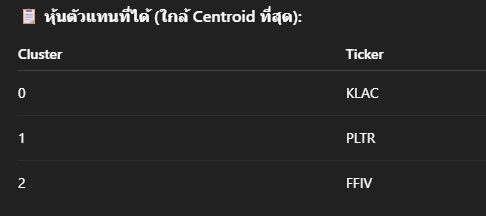



‚úÖ ‡∏ß‡∏¥‡∏ò‡∏µ‡∏ó‡∏µ‡πà 2: ‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡∏´‡∏∏‡πâ‡∏ô‡∏ó‡∏µ‡πà‡πÉ‡∏Å‡∏•‡πâ "‡∏Ñ‡πà‡∏≤‡∏Å‡∏•‡∏≤‡∏á (Median)" ‡∏Ç‡∏≠‡∏á‡∏ü‡∏µ‡πÄ‡∏à‡∏≠‡∏£‡πå‡πÉ‡∏ô‡∏Ñ‡∏•‡∏±‡∏™‡πÄ‡∏ï‡∏≠‡∏£‡πå
‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì Median ‡∏Ç‡∏≠‡∏á MeanLogReturn ‡πÅ‡∏•‡∏∞ Median ‡∏Ç‡∏≠‡∏á Volatility ‡∏†‡∏≤‡∏¢‡πÉ‡∏ô‡∏Ñ‡∏•‡∏±‡∏™‡πÄ‡∏ï‡∏≠‡∏£‡πå

‡∏Ñ‡∏≥‡∏ô‡∏ß‡∏ì Euclidean Distance ‡∏£‡∏∞‡∏´‡∏ß‡πà‡∏≤‡∏á‡∏´‡∏∏‡πâ‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏ï‡∏±‡∏ß‡∏Å‡∏±‡∏ö‡∏ï‡∏≥‡πÅ‡∏´‡∏ô‡πà‡∏á (median, median)

‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡∏ï‡∏±‡∏ß‡∏ó‡∏µ‡πà‡πÉ‡∏Å‡∏•‡πâ‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î = ‡∏ï‡∏±‡∏ß‡πÅ‡∏ó‡∏ô‡∏Ç‡∏≠‡∏á‡∏Å‡∏•‡∏∏‡πà‡∏°‡πÉ‡∏ô‡πÄ‡∏ä‡∏¥‡∏á‡∏Ñ‡πà‡∏≤‡∏Å‡∏•‡∏≤‡∏á

‡πÄ‡∏´‡∏°‡∏≤‡∏∞‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏Å‡∏≤‡∏£‡∏ß‡∏¥‡πÄ‡∏Ñ‡∏£‡∏≤‡∏∞‡∏´‡πå‡∏´‡∏∏‡πâ‡∏ô‡∏ó‡∏µ‡πà‡πÄ‡∏õ‡πá‡∏ô "‡∏Å‡∏•‡∏≤‡∏á" ‡∏Ç‡∏≠‡∏á‡∏Å‡∏•‡∏∏‡πà‡∏° (‡πÑ‡∏°‡πà‡∏™‡∏∏‡∏î‡πÇ‡∏ï‡πà‡∏á)

üìã ‡∏´‡∏∏‡πâ‡∏ô‡∏ï‡∏±‡∏ß‡πÅ‡∏ó‡∏ô‡∏ó‡∏µ‡πà‡πÑ‡∏î‡πâ (‡πÉ‡∏Å‡∏•‡πâ Median ‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î):


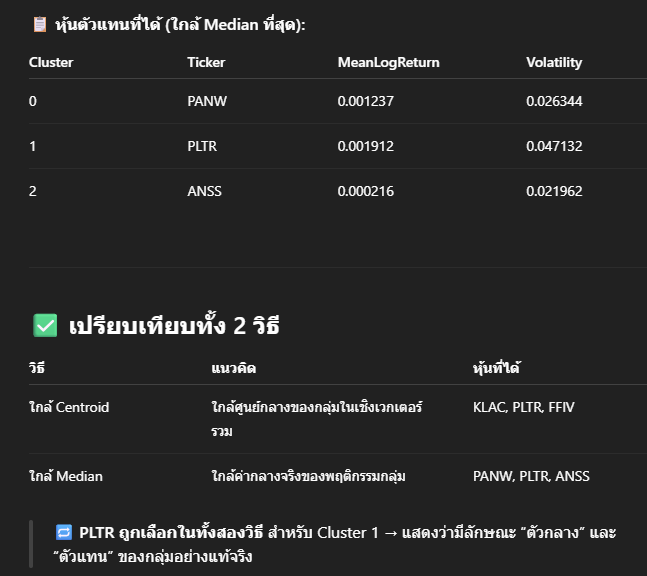


‚úÖ ‡πÄ‡∏õ‡∏£‡∏µ‡∏¢‡∏ö‡πÄ‡∏ó‡∏µ‡∏¢‡∏ö‡∏ó‡∏±‡πâ‡∏á 2 ‡∏ß‡∏¥‡∏ò‡∏µ
‡∏ß‡∏¥‡∏ò‡∏µ	‡πÅ‡∏ô‡∏ß‡∏Ñ‡∏¥‡∏î	‡∏´‡∏∏‡πâ‡∏ô‡∏ó‡∏µ‡πà‡πÑ‡∏î‡πâ
‡πÉ‡∏Å‡∏•‡πâ Centroid	‡πÉ‡∏Å‡∏•‡πâ‡∏®‡∏π‡∏ô‡∏¢‡πå‡∏Å‡∏•‡∏≤‡∏á‡∏Ç‡∏≠‡∏á‡∏Å‡∏•‡∏∏‡πà‡∏°‡πÉ‡∏ô‡πÄ‡∏ä‡∏¥‡∏á‡πÄ‡∏ß‡∏Å‡πÄ‡∏ï‡∏≠‡∏£‡πå‡∏£‡∏ß‡∏°	KLAC, PLTR, FFIV
‡πÉ‡∏Å‡∏•‡πâ Median	‡πÉ‡∏Å‡∏•‡πâ‡∏Ñ‡πà‡∏≤‡∏Å‡∏•‡∏≤‡∏á‡∏à‡∏£‡∏¥‡∏á‡∏Ç‡∏≠‡∏á‡∏û‡∏§‡∏ï‡∏¥‡∏Å‡∏£‡∏£‡∏°‡∏Å‡∏•‡∏∏‡πà‡∏°	PANW, PLTR, ANSS

üîÅ PLTR ‡∏ñ‡∏π‡∏Å‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡πÉ‡∏ô‡∏ó‡∏±‡πâ‡∏á‡∏™‡∏≠‡∏á‡∏ß‡∏¥‡∏ò‡∏µ ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö Cluster 1 ‚Üí ‡πÅ‡∏™‡∏î‡∏á‡∏ß‡πà‡∏≤‡∏°‡∏µ‡∏•‡∏±‡∏Å‡∏©‡∏ì‡∏∞ ‚Äú‡∏ï‡∏±‡∏ß‡∏Å‡∏•‡∏≤‡∏á‚Äù ‡πÅ‡∏•‡∏∞ ‚Äú‡∏ï‡∏±‡∏ß‡πÅ‡∏ó‡∏ô‚Äù ‡∏Ç‡∏≠‡∏á‡∏Å‡∏•‡∏∏‡πà‡∏°‡∏≠‡∏¢‡πà‡∏≤‡∏á‡πÅ‡∏ó‡πâ‡∏à‡∏£‡∏¥‡∏á

In [ ]:
# 1. ‡πÄ‡∏ï‡∏£‡∏µ‡∏¢‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏ó‡∏≥ K-Means

import numpy as np

X = np.array(list(zip(features['MeanLogReturn'], features['Volatility'])))


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


In [ ]:
features['Cluster'] = clusters


In [ ]:
print(features.head())


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(features['MeanLogReturn'], features['Volatility'], c=features['Cluster'], cmap='viridis', s=100, edgecolors='k')
plt.xlabel('Mean Log Return')
plt.ylabel('Volatility')
plt.title('K-Means Clustering')
plt.grid(True)
plt.show()


7. ‡∏ß‡∏¥‡πÄ‡∏Ñ‡∏£‡∏≤‡∏∞‡∏´‡πå‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡∏à‡∏≤‡∏Å Cluster
‡∏î‡∏π‡∏ß‡πà‡∏≤‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏Å‡∏•‡∏∏‡πà‡∏° (Cluster) ‡∏°‡∏µ‡∏•‡∏±‡∏Å‡∏©‡∏ì‡∏∞‡∏¢‡∏±‡∏á‡πÑ‡∏á

‡πÄ‡∏ä‡πà‡∏ô ‡∏Å‡∏•‡∏∏‡πà‡∏°‡πÑ‡∏´‡∏ô‡∏Ñ‡∏ß‡∏≤‡∏°‡πÄ‡∏™‡∏µ‡πà‡∏¢‡∏á‡∏™‡∏π‡∏á ‡∏ú‡∏•‡∏ï‡∏≠‡∏ö‡πÅ‡∏ó‡∏ô‡∏™‡∏π‡∏á ‡∏Å‡∏•‡∏∏‡πà‡∏°‡πÑ‡∏´‡∏ô‡∏Ñ‡∏ß‡∏≤‡∏°‡πÄ‡∏™‡∏µ‡πà‡∏¢‡∏á‡∏ï‡πà‡∏≥ ‡∏ú‡∏•‡∏ï‡∏≠‡∏ö‡πÅ‡∏ó‡∏ô‡∏ï‡πà‡∏≥

‡∏à‡∏∞‡∏ä‡πà‡∏ß‡∏¢‡πÉ‡∏´‡πâ‡∏Ñ‡∏∏‡∏ì‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡∏´‡∏∏‡πâ‡∏ô‡∏´‡∏£‡∏∑‡∏≠‡∏ï‡∏±‡πâ‡∏á‡∏Å‡∏•‡∏¢‡∏∏‡∏ó‡∏ò‡πå‡∏•‡∏á‡∏ó‡∏∏‡∏ô‡∏ï‡∏≤‡∏°‡∏Å‡∏•‡∏∏‡πà‡∏°‡πÑ‡∏î‡πâ

In [ ]:
for c in features['Cluster'].unique():
    print(f"Cluster {c}:")
    print(features[features['Cluster'] == c][['MeanLogReturn', 'Volatility']].describe())
    print()


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
scatter = plt.scatter(features['MeanLogReturn'], features['Volatility'],
                      c=features['Cluster'], cmap='viridis', s=100, edgecolors='k', alpha=0.8)

for i, row in features.iterrows():
    plt.text(row['MeanLogReturn'], row['Volatility'], row['Ticker'], fontsize=8, alpha=0.9)

plt.xlabel('Mean Log Return')
plt.ylabel('Volatility')
plt.title('K-Means Clustering of Tech Stocks')
plt.grid(True)
plt.colorbar(scatter, label='Cluster')
plt.show()


In [ ]:
for c in features['Cluster'].unique():
    print(f"Cluster {c} summary:")
    print(features[features['Cluster'] == c][['MeanLogReturn', 'Volatility']].describe())
    print()


In [ ]:
features.to_excel("tech_stocks_clustered.xlsx", index=False)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

X = np.array(list(zip(features['MeanLogReturn'], features['Volatility'])))
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

for k in [2, 4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    features['Cluster'] = clusters

    print(f"===== Results for k = {k} =====")
    print(features.groupby('Cluster')[['MeanLogReturn', 'Volatility']].mean())
    print()

    plt.figure(figsize=(8,5))
    scatter = plt.scatter(features['MeanLogReturn'], features['Volatility'],
                          c=features['Cluster'], cmap='viridis', s=100, edgecolors='k', alpha=0.8)
    plt.xlabel('Mean Log Return')
    plt.ylabel('Volatility')
    plt.title(f'K-Means Clustering (k={k})')
    plt.grid(True)
    plt.colorbar(scatter, label='Cluster')
    plt.show()


In [ ]:
kmeans = KMeans(n_clusters=3, max_iter=300, tol=1e-4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


In [ ]:
import numpy as np

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

def kmeans_manual(X, k, max_iters=100, tol=1e-4):
    np.random.seed(42)
    centroids = X[np.random.choice(len(X), k, replace=False)]

    for i in range(max_iters):
        clusters = []
        for x in X:
            distances = [euclidean_distance(x, c) for c in centroids]
            clusters.append(np.argmin(distances))
        clusters = np.array(clusters)

        new_centroids = np.array([X[clusters == i].mean(axis=0) for i in range(k)])

        # ‡∏ñ‡πâ‡∏≤ centroids ‡πÑ‡∏°‡πà‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡πÅ‡∏õ‡∏•‡∏á‡πÄ‡∏Å‡∏¥‡∏ô tol ‡∏´‡∏¢‡∏∏‡∏î loop
        if np.all(np.linalg.norm(new_centroids - centroids, axis=1) < tol):
            print(f"Converged at iteration {i+1}")
            break
        centroids = new_centroids

    return clusters, centroids

# ‡πÉ‡∏ä‡πâ‡∏á‡∏≤‡∏ô
clusters, centroids = kmeans_manual(X_scaled, k=3)


In [ ]:
print(len(tickers))  # ‡∏ï‡πâ‡∏≠‡∏á‡πÄ‡∏ó‡πà‡∏≤‡∏Å‡∏±‡∏ö 69
print(len(features)) # ‡∏ï‡πâ‡∏≠‡∏á‡πÄ‡∏ó‡πà‡∏≤‡∏Å‡∏±‡∏ö 69


In [ ]:
tickers = xls.sheet_names  # ‡∏™‡∏°‡∏°‡∏ï‡∏¥‡πÉ‡∏ä‡πâ xls = pd.ExcelFile('‡πÑ‡∏ü‡∏•‡πå‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏∏‡∏ì.xlsx')


In [ ]:
features['Ticker'] = tickers


In [ ]:
import pandas as pd

# ‡∏™‡∏°‡∏°‡∏ï‡∏¥‡∏Ñ‡∏∏‡∏ì‡∏°‡∏µ‡∏ä‡∏∑‡πà‡∏≠‡∏´‡∏∏‡πâ‡∏ô‡πÉ‡∏ô‡∏ï‡∏±‡∏ß‡πÅ‡∏õ‡∏£ tickers
features = pd.DataFrame(X_scaled, columns=['MeanLogReturn_scaled', 'Volatility_scaled'])
features['Cluster'] = clusters
features['Ticker'] = tickers  # ‡πÉ‡∏™‡πà‡∏ä‡∏∑‡πà‡∏≠‡∏´‡∏∏‡πâ‡∏ô‡πÉ‡∏´‡πâ‡∏ï‡∏£‡∏á‡∏Å‡∏±‡∏ö‡∏•‡∏≥‡∏î‡∏±‡∏ö‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•

print(features.head())


In [ ]:
print(features.columns)


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
scatter = plt.scatter(features['MeanLogReturn_scaled'], features['Volatility_scaled'],
                      c=features['Cluster'], cmap='viridis', s=100, edgecolors='k', alpha=0.8)

for i, row in features.iterrows():
    plt.text(row['MeanLogReturn_scaled'], row['Volatility_scaled'], row['Ticker'], fontsize=8, alpha=0.9)

plt.xlabel('Mean Log Return (scaled)')
plt.ylabel('Volatility (scaled)')
plt.title('K-Means Clustering of Tech Stocks (scaled)')
plt.grid(True)
plt.colorbar(scatter, label='Cluster')
plt.show()


In [ ]:
for c in features['Cluster'].unique():
    group = features[features['Cluster'] == c]
    print(f"--- Cluster {c} ---")
    print(f"‡∏à‡∏≥‡∏ô‡∏ß‡∏ô‡∏´‡∏∏‡πâ‡∏ô: {len(group)}")
    print(f"Mean Log Return (scaled):")
    print(f"  ‡∏Ñ‡πà‡∏≤‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢: {group['MeanLogReturn_scaled'].mean():.4f}")
    print(f"  ‡∏™‡πà‡∏ß‡∏ô‡πÄ‡∏ö‡∏µ‡πà‡∏¢‡∏á‡πÄ‡∏ö‡∏ô‡∏°‡∏≤‡∏ï‡∏£‡∏ê‡∏≤‡∏ô: {group['MeanLogReturn_scaled'].std():.4f}")
    print(f"Volatility (scaled):")
    print(f"  ‡∏Ñ‡πà‡∏≤‡πÄ‡∏â‡∏•‡∏µ‡πà‡∏¢: {group['Volatility_scaled'].mean():.4f}")
    print(f"  ‡∏™‡πà‡∏ß‡∏ô‡πÄ‡∏ö‡∏µ‡πà‡∏¢‡∏á‡πÄ‡∏ö‡∏ô‡∏°‡∏≤‡∏ï‡∏£‡∏ê‡∏≤‡∏ô: {group['Volatility_scaled'].std():.4f}")
    print(f"‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏´‡∏∏‡πâ‡∏ô‡πÉ‡∏ô‡∏Å‡∏•‡∏∏‡πà‡∏°: {', '.join(group['Ticker'].head(5).tolist())}")
    print()


In [ ]:
features.to_excel("tech_stocks_with_clusters.xlsx", index=False)


In [ ]:
with pd.ExcelWriter("tech_stocks_clustered_separated.xlsx") as writer:
    for c in features['Cluster'].unique():
        group_df = features[features['Cluster'] == c]
        group_df.to_excel(writer, sheet_name=f'Cluster_{c}', index=False)


In [ ]:
group_summary = features.groupby('Cluster')[['MeanLogReturn_scaled', 'Volatility_scaled']].mean()
print(group_summary)
